In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_USERNAME']="daominhkhanh"
os.environ['KAGGLE_KEY']="90e6f266906e9dcfeae1afea9a0630ac"
!kaggle datasets download -d authman/pickled-glove840b300d-for-10sec-loading

100% 2.33G/2.33G [00:30<00:00, 47.2MB/s]
100% 2.33G/2.33G [00:30<00:00, 81.3MB/s]


In [ ]:
!unzip pickled-glove840b300d-for-10sec-loading.zip

Archive:  pickled-glove840b300d-for-10sec-loading.zip
  inflating: glove.840B.300d.pkl     


In [ ]:
!cp -r /content/drive/MyDrive/Flickr8k/Image /content

In [ ]:
import torch
from torchvision import transforms as T
from matplotlib import pyplot as plt
import numpy as np
from model_attention import Encoder,Decoder
import pickle
import random
from random import randint
from PIL import Image 
import os 
import pandas as pd 
import time
from load_data import Vocabulary,Flickr8k,MyCollate

In [ ]:
with open(f'/content/drive/MyDrive/Attention2/dataset.pickle','rb') as file:
    dataset=pickle.load(file)

In [ ]:
model_state=torch.load('/content/drive/MyDrive/Attention2/model30.pth')
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs=300
attention_dim=512
decoder_dim=512
embedding_dim=300
vocab_size=6000
encoder=Encoder().to(device)
decoder=Decoder(attention_dim=attention_dim,decoder_dim=decoder_dim,embedding_dim=embedding_dim,vocab_size=vocab_size,vocabulary=dataset.vocabulary).to(device)
encoder.load_state_dict(model_state['encoder_state_dict'])
decoder.load_state_dict(model_state['decoder_state_dict'])
encoder.eval()
decoder.eval()

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


Decoder(
  (embedding): Embedding(6000, 300)
  (attention): AttentionBahdanau(
    (weight_decoder): Linear(in_features=512, out_features=512, bias=True)
    (weight_encoder): Linear(in_features=2048, out_features=512, bias=True)
    (full): Linear(in_features=512, out_features=1, bias=True)
    (relu): ReLU()
    (softmax): Softmax(dim=1)
  )
  (lstm_cell1): LSTMCell(2348, 512)
  (fcn): Linear(in_features=512, out_features=6000, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (init_h): Linear(in_features=2048, out_features=512, bias=True)
  (init_c): Linear(in_features=2048, out_features=512, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
def preprocessing(path):
    transform=T.Compose([
        T.Resize(226),
        T.RandomCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.2])
    ])
    image = Image.open(path)
    image=transform(image)
    return image

def show_image(image,caption,caption_beam=None,file_name="random.png"):
    #plt.figure(figsize=(10,10))
    image[0]=image[0]*0.229+0.485
    image[1]=image[1]*0.224+0.456
    image[2]=image[2]*0.225+0.406

    fig,ax=plt.subplots(1,1)
    image=image.permute(1,2,0).numpy()
    im=ax.imshow(image,interpolation='nearest')
    if caption_beam is not None:
        #title='Greedy search: '+caption+'\nBeam seach: '+caption_beam
        title='Beam seach: '+caption_beam
        #print(f"Greedy Search: {caption}\nBeam Search: {caption_beam}")
    
    else:
        title='Greedy search: '+caption
        print(f"Greedy Search: {caption}")

    ax.set_title(title)
    if os.path.exists('/content/Result1') is False:
        os.mkdir('/content/Result1')

    plt.savefig('Result1/{}'.format(file_name))
    #plt.show()
    #print("save done:",file_name)

In [ ]:
def caption(path,image_name1):
  path=os.path.join(path,image_name1)
  image=preprocessing(path)
  feature=encoder(image.unsqueeze(dim=0).to(device))
  caption=decoder.image_captions(feature,dataset.vocabulary)
  caption_beam=decoder.beam_search(feature,dataset.vocabulary)
  caption=' '.join([word for word in caption])
  caption_beam=' '.join([word for word in caption_beam])
  #print(caption_beam)
  show_image(image,caption,caption_beam,image_name1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


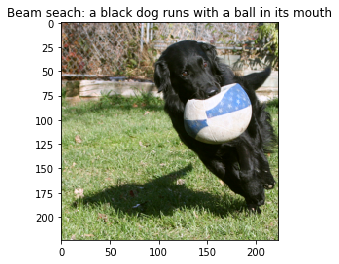

In [ ]:
caption('/content','2.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


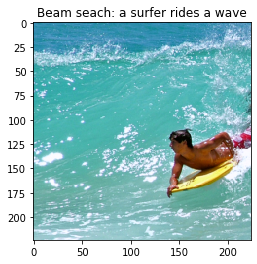

In [ ]:
caption('/content','18.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


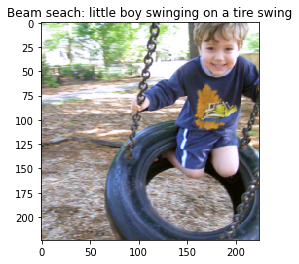

In [ ]:
caption('/content','12.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


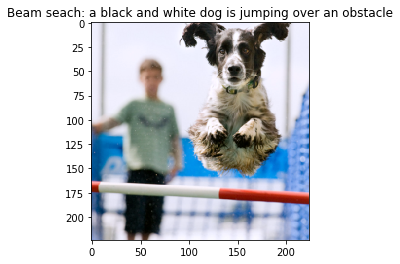

In [ ]:
caption('/content/Image','2853743795_e90ebc669d.jpg')